# Quantum Fourier Transform
## Matvei Karp
03/02/2025

## Imports

### Importing Qiskit

Qiskit Itself

In [1]:
from qiskit import *

Visualisations

In [2]:
from qiskit.visualization import plot_bloch_multivector
from qiskit.visualization import plot_histogram

Simulators

In [3]:
from qiskit_aer import AerSimulator
from qiskit_ibm_runtime import QiskitRuntimeService

### Importing Other Useful Libraries

Numpy

*Python's scientific computing package*

In [4]:
import numpy as np

## Display Functions

### Histogram

executes the circuit in an ideal environment 4096 times and returns the results as a histogram

    Parameters
    ----------
    circuit: QuantumCircuit
        The circuit to be executed
    Returns
    -------
    None

In [5]:
def histogram(circuit):
    circ = circuit.copy()
    aersim = AerSimulator()
    circTranspiled = transpile(circ,aersim)
    result_ideal = aersim.run(circTranspiled, shots=4096).result()
    counts_ideal = result_ideal.get_counts(0)
    return counts_ideal

## The Problem

Convert a state into the Fourier basis

![Circuit Image](QFT.png)

## Main Workspace

### 1. Setting up the register
    In this example, we will use a 4 qubit register.

In [6]:
m=4
main = QuantumRegister(m,"main")
circuit = QuantumCircuit(main)

### 2. Setting up an interesting state
    In this example, we will use the 4 qubit GHZ state

First we apply a Hadamard gate to the first qubit

In [7]:
circuit.h(main[0])

Next, we apply a series of controlled X gates to entangle all of the qubits

In [8]:
for i in range(1,m):
    circuit.cx(main[i-1],main[i])

Add a barrier to make later steps clearer

In [9]:
circuit.barrier(main)

#### Visualization

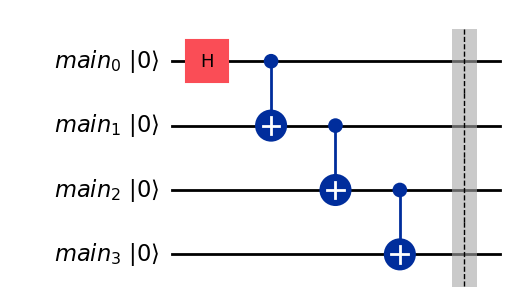

In [10]:
circuit.draw(justify = "none", initial_state=True, output="mpl")

Create a copy of the circuit and measure it to see the distribution of the GHZ state

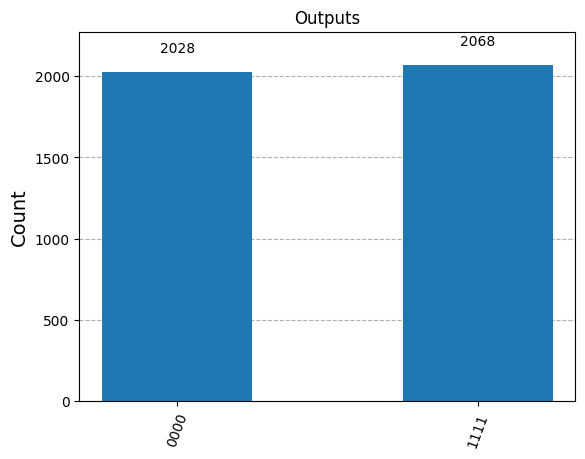

In [11]:
circ=circuit.copy()
circ.measure_all()
counts_ideal=histogram(circ)
plot_histogram(counts_ideal, title='Outputs')

### 3. Swap gates

In [12]:
for i in range(m//2):
    circuit.swap(main[i],main[m-i-1])

### 4. The controlled sequence

In [13]:
for i in range(m):
    circuit.h(i)
    for k in range(m-1,i,-1):
        j = k-i
        circuit.cp(np.pi/(2**j),main[k],main[i])

### 5. Visualization

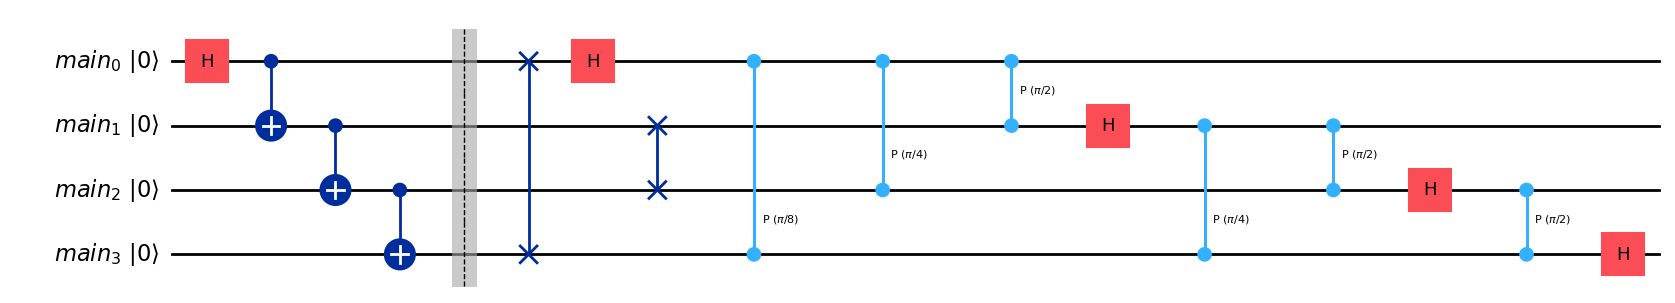

In [14]:
circuit.draw(justify = "none", initial_state=True, output="mpl")

### 6. Measurement
    This is not a part of the algorithm, but lets look at what we've done

In [15]:
circuit.measure_all()

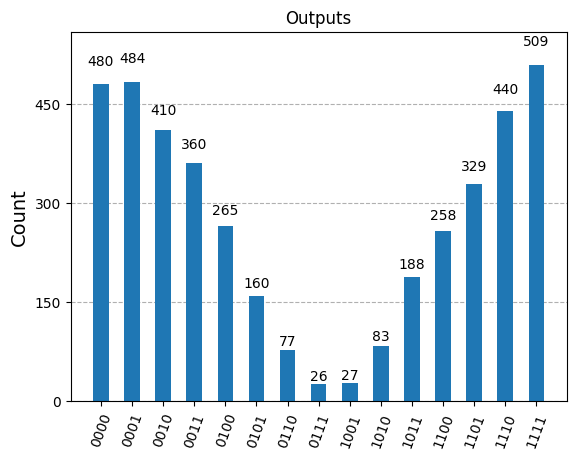

In [16]:
counts_ideal=histogram(circuit)
plot_histogram(counts_ideal, title='Outputs')